In [1]:
%store -r epochs_bgd epochs_sgd epochs_mbsgd
%store -r parameters_bgd parameters_sgd parameters_mbsgd
%store -r costs_bgd costs_sgd costs_mbsgd

In [2]:
%run gradient_descent.ipynb

Stored 'epochs_bgd' (list)
Stored 'parameters_bgd' (list)
Stored 'costs_bgd' (list)
Stored 'epochs_sgd' (list)
Stored 'parameters_sgd' (list)
Stored 'costs_sgd' (list)
Stored 'epochs_mbsgd' (list)
Stored 'parameters_mbsgd' (list)
Stored 'costs_mbsgd' (list)


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

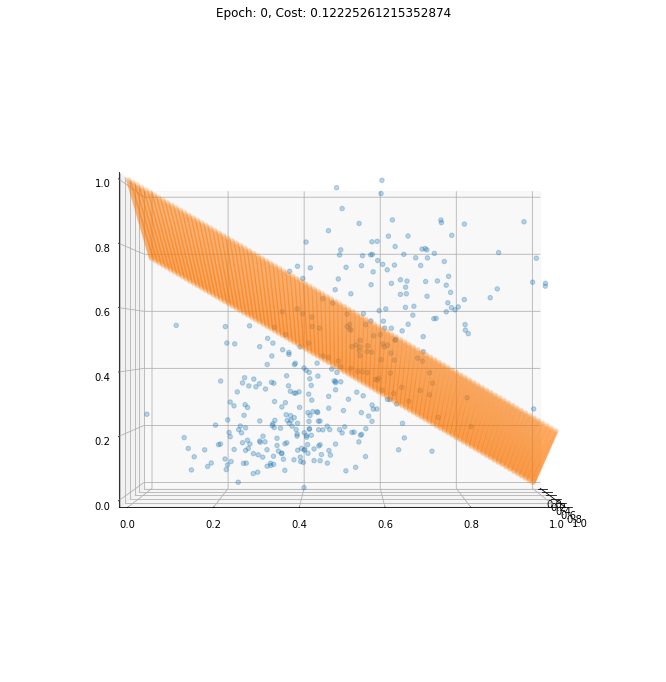

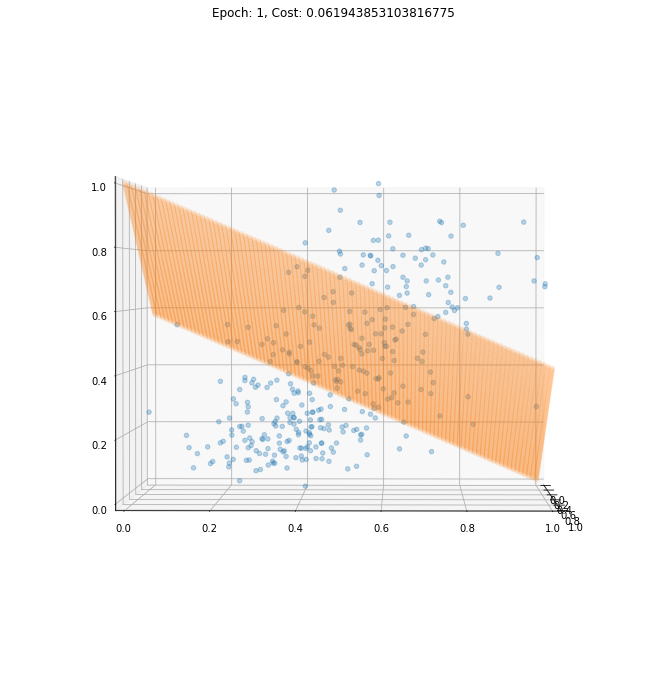

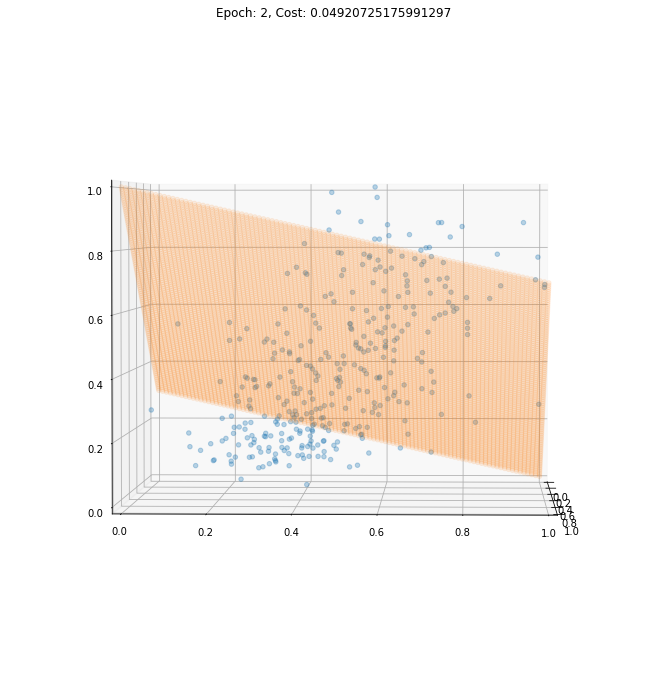

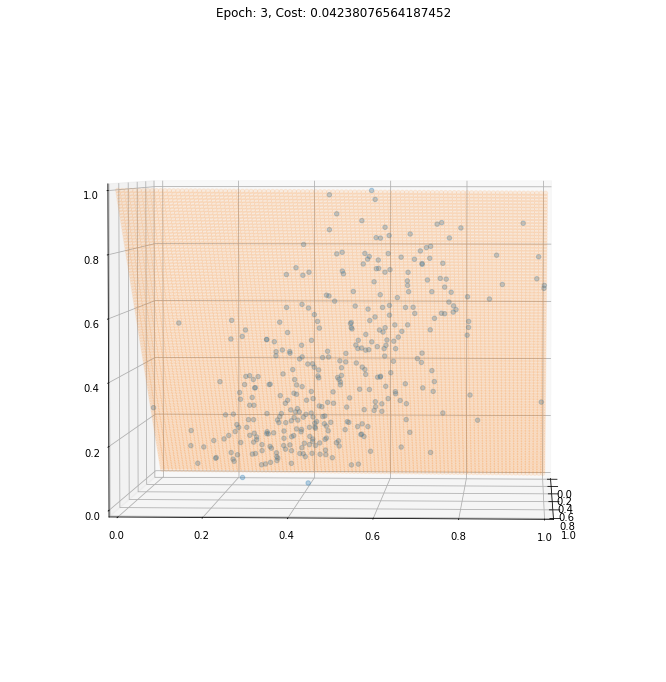

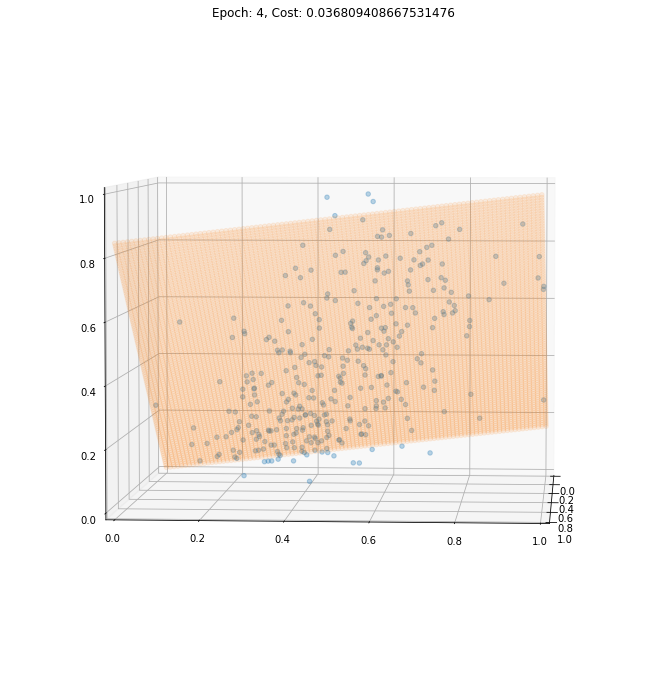

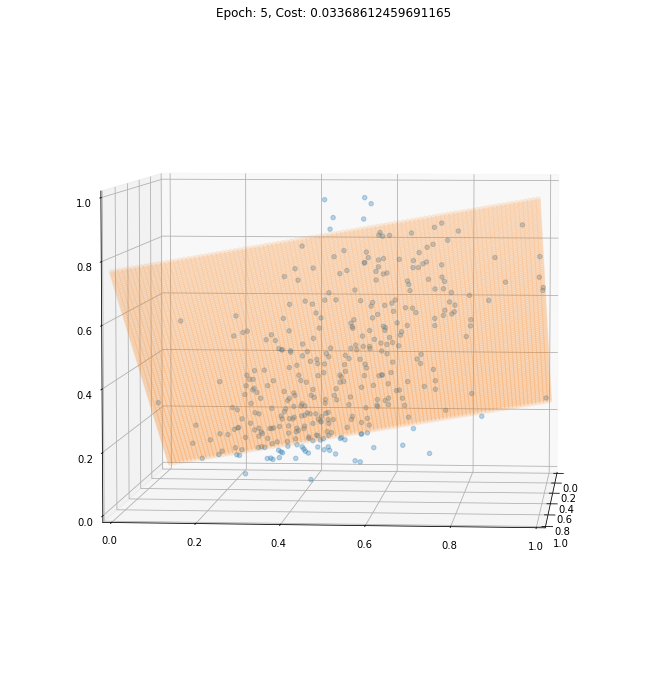

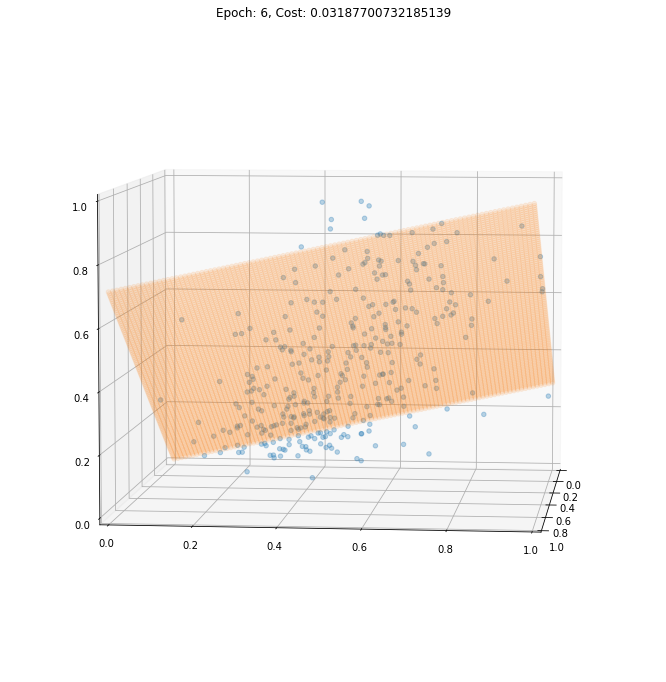

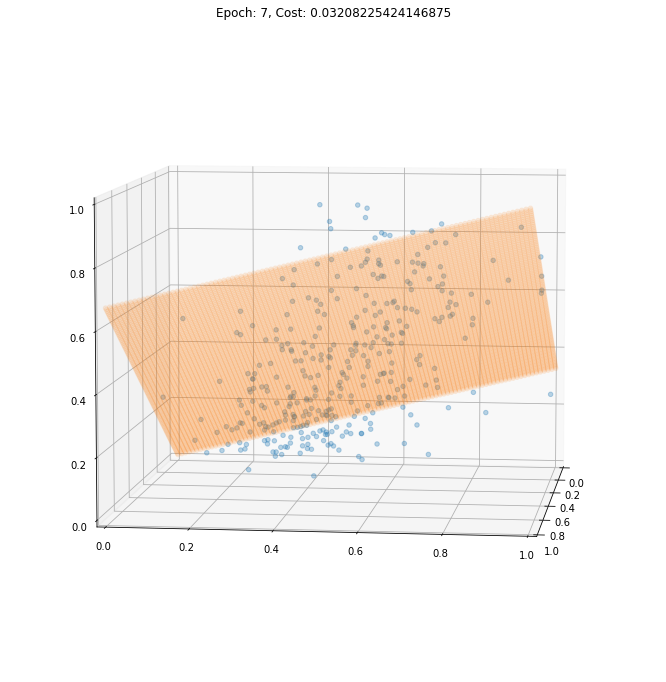

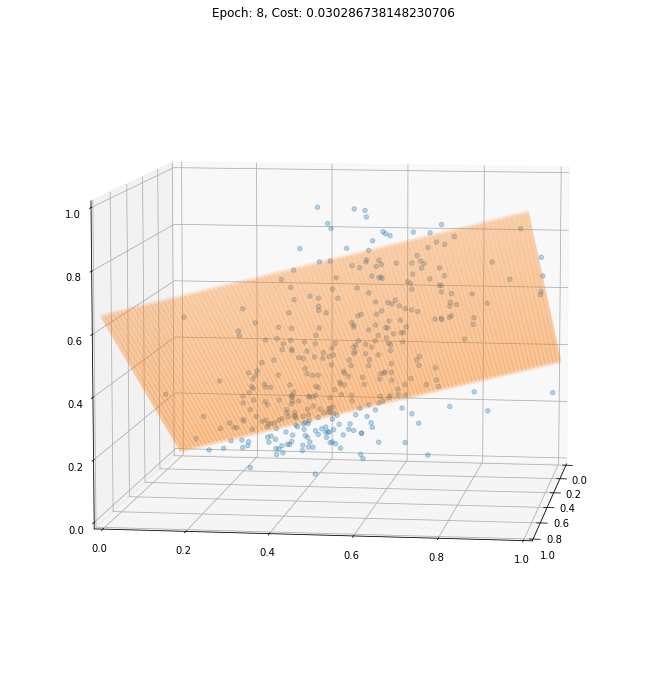

In [4]:
index = 0
plot_index = 0
img_list = []
while index < len(epochs_sgd):
    fig = plt.figure(figsize = (20, 12))
    ax = plt.axes(projection='3d')
    x = np.linspace(0, 1, 100)
    y = np.linspace(0, 1, 100)
    X, Y = np.meshgrid(x, y)
    x_comb = []
    for i in X:
        for j in i:
            x_comb.append(j)
    y_comb = []
    for i in Y:
        for j in i:
            y_comb.append(j)
    f = np.concatenate((np.array(x_comb).reshape(10000, 1), np.array(y_comb).reshape(10000, 1), np.ones((10000, 1))), axis = 1)
    preds = predict(f, parameters_sgd[index])
    scaler = MinMaxScaler()
    preds = scaler.fit_transform(preds)
    preds = preds.reshape(100, 100)
    Z = preds
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_zlim(0, 1)
    plt.title(f"Epoch: {index}, Cost: {mse(X_train, y_train, parameters_sgd[index])}")
    ax.scatter3D(X_train[:, 0], X_train[:, 1], y_train, alpha = 0.3)
    ax.scatter3D(X,Y,Z, alpha = 0.1, depthshade = True)
    ax.view_init(plot_index, plot_index)
    plt.savefig(f"{plot_index}.png")
    img_list.append(f"{plot_index}.png")
    index += 1
    plot_index += 1
    plt.show()

In [5]:
import imageio
with imageio.get_writer('gradient_descent.gif', mode='I') as writer:
    for filename in img_list:
        image = imageio.imread(filename)
        writer.append_data(image)

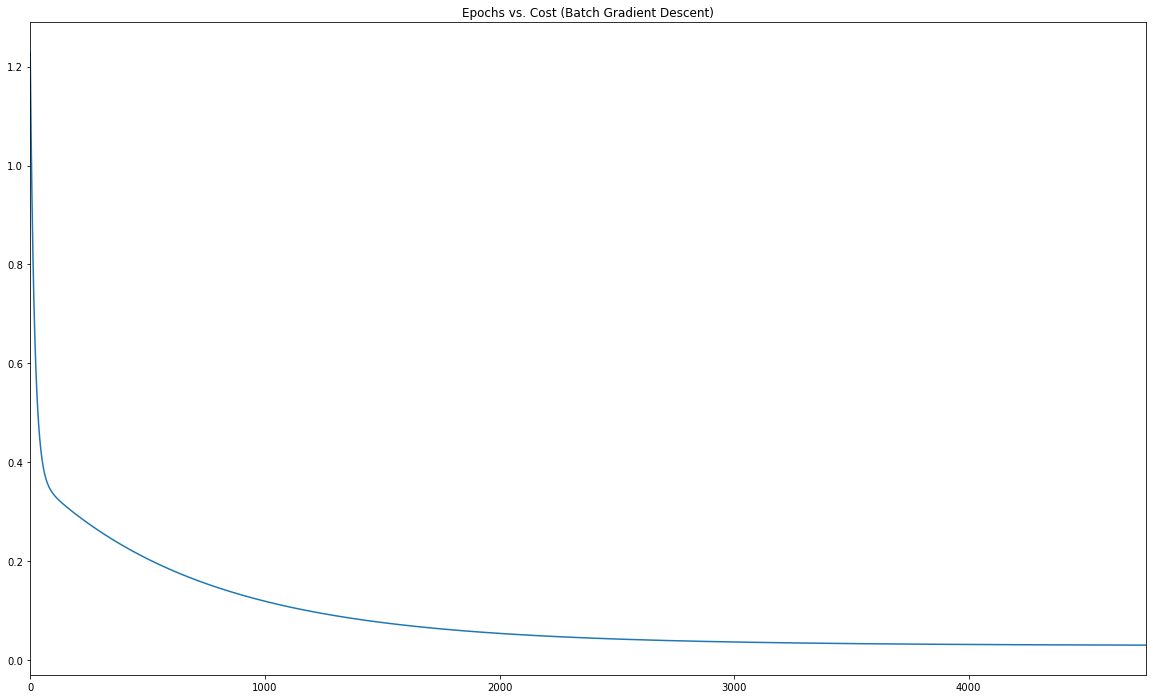

In [9]:
fig = plt.figure(figsize = (20, 12))
plt.xlim(0, len(epochs_bgd))
plt.title("Epochs vs. Cost (Batch Gradient Descent)")
plt.plot(epochs_bgd, costs_bgd)
plt.show()

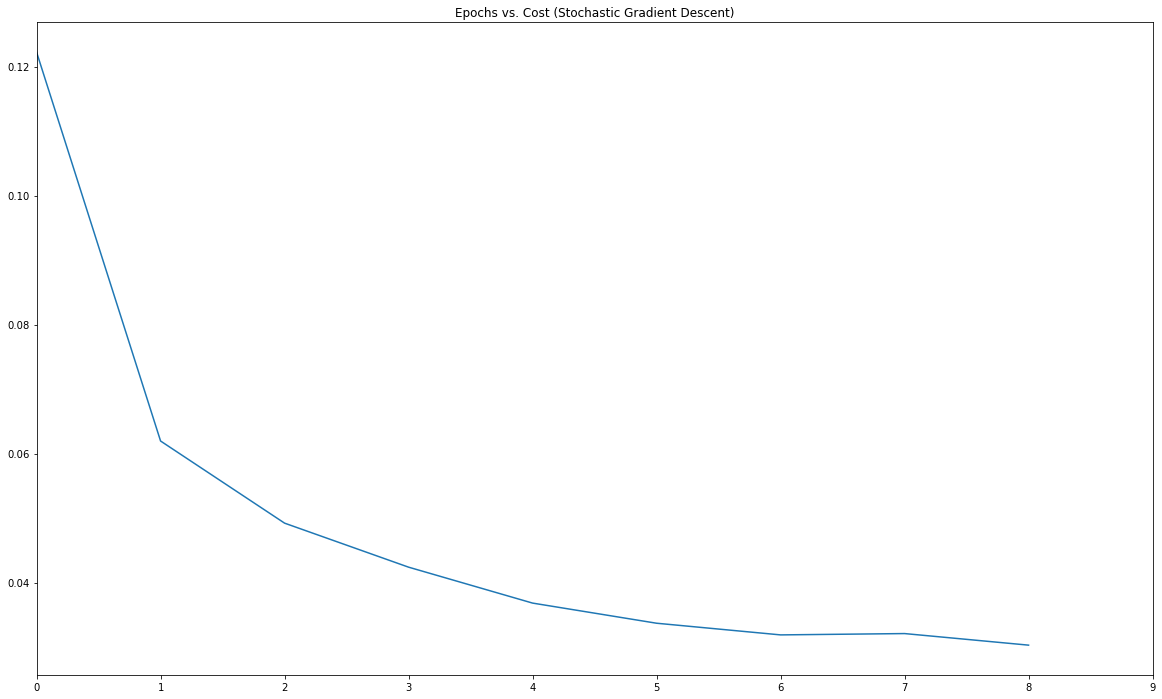

In [10]:
fig = plt.figure(figsize = (20, 12))
plt.xlim(0, len(epochs_sgd))
plt.title("Epochs vs. Cost (Stochastic Gradient Descent)")
plt.plot(epochs_sgd, costs_sgd)
plt.show()

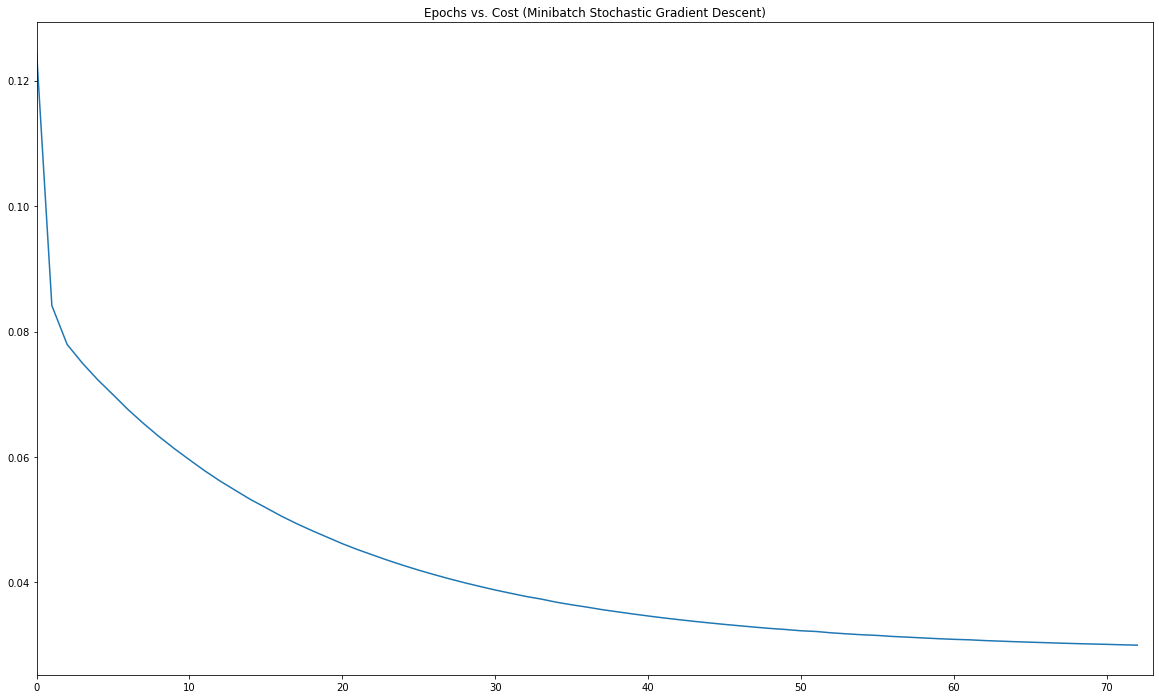

In [11]:
fig = plt.figure(figsize = (20, 12))
plt.xlim(0, len(epochs_mbsgd))
plt.title("Epochs vs. Cost (Minibatch Stochastic Gradient Descent)")
plt.plot(epochs_mbsgd, costs_mbsgd)
plt.show()